In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hotelbookingsinfo.csv')

In [3]:
data.head()

,hotel,is_canceled,leadtime,arrivalyear,arrivalmonth,arrivalweeknumber,arrivaldayofmonth,staysweekendnights,staysweeknights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.shape

(119390, 32)

In [5]:
data.columns

Index(['hotel', 'is_canceled', 'leadtime', 'arrivalyear', 'arrivalmonth',
       'arrivalweeknumber', 'arrivaldayofmonth', 'staysweekendnights',
       'staysweeknights', 'adults', 'children', 'babies', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
leadtime                               0
arrivalyear                            0
arrivalmonth                           0
arrivalweeknumber                      0
arrivaldayofmonth                      0
staysweekendnights                     0
staysweeknights                        0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [8]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [9]:
data['is_repeated_guest'].unique()
data['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [12]:
data.drop(['reservation_status_date','country','reservation_status','adr', 'company','agent'], inplace = True, axis = 1)

In [13]:
data[data['children'].isnull()]

,hotel,is_canceled,leadtime,arrivalyear,arrivalmonth,arrivalweeknumber,arrivaldayofmonth,staysweekendnights,staysweeknights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,0,0,B,B,0,No Deposit,0,Transient-Party,0,1
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,0,0,B,B,0,No Deposit,0,Transient-Party,0,1
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,0,0,B,B,0,No Deposit,0,Transient-Party,0,2
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,0,0,B,B,0,No Deposit,0,Transient-Party,0,1


In [67]:
data['children'] = data['children'].replace(np.NAN, data['children'].mean())
data['children'].isnull().sum()

0

In [68]:
data['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [69]:
data['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [70]:
data['customer_type'].value_counts()

0    89613
2    25124
1     4076
3      577
Name: customer_type, dtype: int64

In [71]:
obj_data = data.select_dtypes(include=['object']).copy()

In [72]:
data['hotel'].value_counts()

1    79330
0    40060
Name: hotel, dtype: int64

In [73]:
d1= data[data['hotel'] == 'Resort Hotel']

In [74]:
d1.shape

(0, 26)

In [75]:
d2 = data[data['hotel'] == 'City Hotel']

In [76]:
d2.shape

(0, 26)

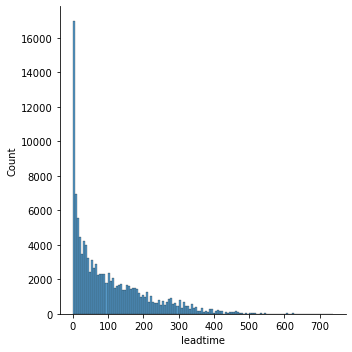

In [77]:
sns.displot(data['leadtime'])

C:\Users\lhajizade\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='staysweekendnights', ylabel='count'>

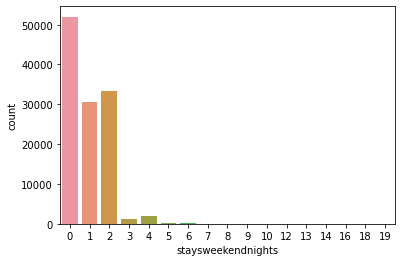

In [78]:
sns.countplot(data['staysweekendnights'])

C:\Users\lhajizade\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='staysweekendnights', ylabel='count'>

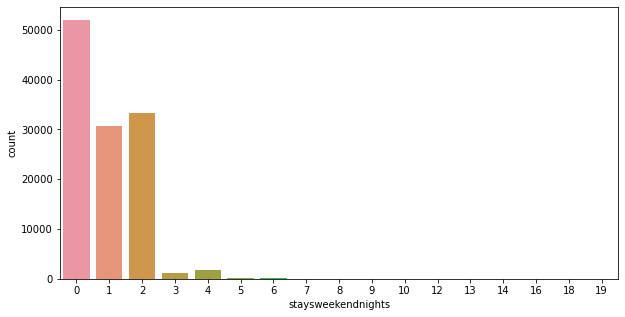

In [79]:
fig = plt.figure(figsize =  (10,5))
sns.countplot(data['staysweekendnights'])

C:\Users\lhajizade\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

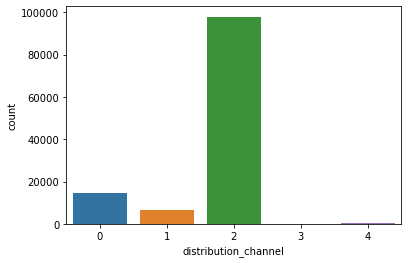

In [80]:
sns.countplot(data['distribution_channel'])

C:\Users\lhajizade\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

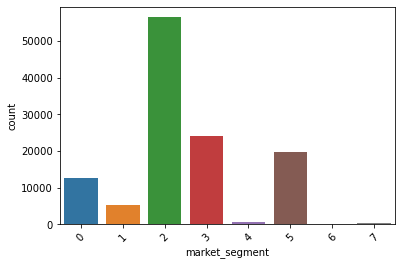

In [81]:
sns.countplot(data['market_segment'])
plt.xticks(rotation = 45)

In [82]:
#EDA

In [83]:
data.dtypes

hotel                               int64
is_canceled                         int64
leadtime                            int64
arrivalyear                         int64
arrivalmonth                        int64
arrivalweeknumber                   int64
arrivaldayofmonth                   int64
staysweekendnights                  int64
staysweeknights                     int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                     

In [84]:
data['hotel'].replace(['Resort Hotel', 'City Hotel'],
                        [0, 1], inplace=True)

In [85]:
data['meal'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [86]:
data['meal'].replace(['BB', 'FB', 'HB', 'SC', 'Undefined'], [0,1,2,3,4], inplace = True)

In [87]:
data['market_segment'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [88]:
data['market_segment'].replace(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], [0,1,2,3,4,5,6,7], inplace = True)

In [89]:
data['distribution_channel'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [90]:
data['distribution_channel'].replace(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], [0,1,2,3,4], inplace = True)

In [91]:
data['reserved_room_type'].unique()

array(['C'], dtype=object)

In [92]:
data['reserved_room_type'].replace(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], inplace = True)

In [93]:
data['assigned_room_type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [94]:
data['assigned_room_type'].replace(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'], [0,1,2,3,4,5,6,7,8,9,10,11], inplace = True)

In [95]:
data['deposit_type'].unique()

array([0, 1, 2], dtype=int64)

In [96]:
data['deposit_type'].replace(['No Deposit', 'Refundable', 'Non Refund'], [0,1,2], inplace = True)

In [97]:
data['customer_type'].unique()

array([0, 1, 2, 3], dtype=int64)

In [98]:
data['customer_type'].replace(['Transient', 'Contract', 'Transient-Party', 'Group'], [0,1,2,3], inplace = True)

In [99]:
data['arrivalmonth'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [100]:
data['arrivalmonth'].replace(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'], [0,1,2,3,4,5,6,7,8,9,10,11], inplace = True)

<AxesSubplot:>

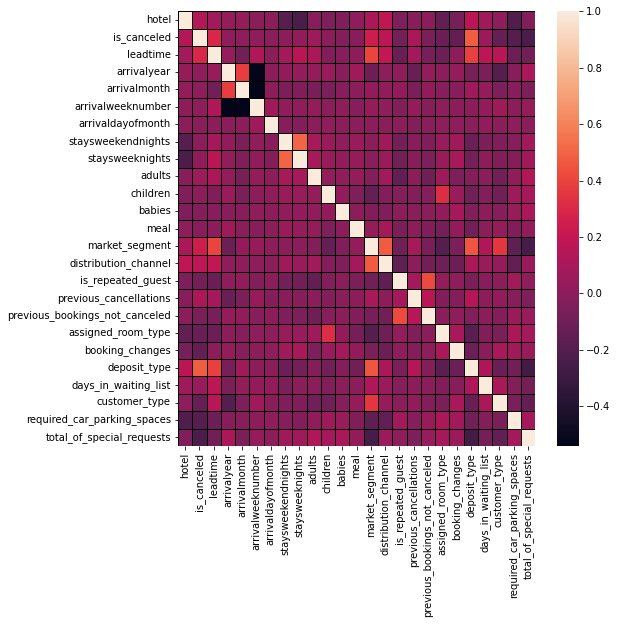

In [101]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), linecolor = 'black', linewidths = 0.5)

In [102]:
#Train & Test

In [103]:
y = data['is_canceled']

In [104]:
x = data.drop(['is_canceled', 'reserved_room_type','assigned_room_type'],axis= 1, inplace = False)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   leadtime                        119390 non-null  int64  
 2   arrivalyear                     119390 non-null  int64  
 3   arrivalmonth                    119390 non-null  int64  
 4   arrivalweeknumber               119390 non-null  int64  
 5   arrivaldayofmonth               119390 non-null  int64  
 6   staysweekendnights              119390 non-null  int64  
 7   staysweeknights                 119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  market_segment  

In [105]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [106]:
#Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [108]:
logreg =LogisticRegression()
logreg.fit(xtrain_scaled, ytrain)


LogisticRegression()

In [130]:
ypred = logreg.predict(xtest_scaled)

In [131]:
accuracy_score(ytest, ypred)

0.7876706591841863

In [132]:
confusion_matrix(ytest, ypred)

array([[21374,  1150],
       [ 6455,  6838]], dtype=int64)

In [120]:
#Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rfmodel = RandomForestClassifier()

In [135]:
rfmodel.fit(xtrain, ytrain)

RandomForestClassifier()

In [136]:
ypred = rfmodel.predict(xtest)

In [137]:
confusion_matrix(ytest, ypred)

array([[20749,  1775],
       [ 3416,  9877]], dtype=int64)

In [138]:
accuracy_score(ytest, ypred)

0.8550688220677332